In [1]:
#!pip install pandas

# Cargar  librerías

In [2]:
import numpy as np
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000)

# Data cleaning.

Es fundamental tener datos de calidad a la hora de realizar modelos de Machine Learning. Uno de los primeros pasos que se siguen antes de diseñar un modelo es la limpieza de los mismos, a este procedimiento se le llama Data Cleaning. 

https://www.kaggle.com/discussions/getting-started/250322

## Importar los datos

In [3]:
path = "https://www.kaggle.com/datasets/estiven0507/domestic-violence-in-colombia"
od.download(path, data_dir=".")

Skipping, found downloaded files in "./domestic-violence-in-colombia" (use force=True to force download)


In [4]:
df_violence = pd.read_csv("domestic-violence-in-colombia/raw_data.csv", index_col=0)
df_violence

/tmp/ipykernel_60548/4213647641.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_violence = pd.read_csv("domestic-violence-in-colombia/raw_data.csv", index_col=0)


,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etario,cantidad
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,1
...,...,...,...,...,...,...,...,...
575716,VALLE,CARTAGO,76147000,SIN EMPLEO DE ARMAS,28/02/2023,FEMENINO,ADULTOS,1
575717,VALLE,GUACARÍ,76318000,SIN EMPLEO DE ARMAS,28/02/2023,FEMENINO,ADULTOS,1
575718,VALLE,GUADALAJARA DE BUGA,76111000,SIN EMPLEO DE ARMAS,28/02/2023,FEMENINO,ADULTOS,1
575719,VALLE,PALMIRA,76520000,SIN EMPLEO DE ARMAS,28/02/2023,FEMENINO,ADULTOS,2


## Buscar valores NaN

In [5]:
# Información general del dataframe
df_violence.info()

<class 'pandas.core.frame.DataFrame'>
Index: 575721 entries, 0 to 575720
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   departamento  575721 non-null  object
 1   municipio     575721 non-null  object
 2   codigo_dane   575721 non-null  object
 3   armas_medios  575721 non-null  object
 4   fecha_hecho   575721 non-null  object
 5   genero        575721 non-null  object
 6   grupo_etario  574110 non-null  object
 7   cantidad      575721 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 39.5+ MB


In [6]:
# Los valores nulos del dataframe
df_violence.isna().sum()

departamento       0
municipio          0
codigo_dane        0
armas_medios       0
fecha_hecho        0
genero             0
grupo_etario    1611
cantidad           0
dtype: int64

In [7]:
# Valores nulos como porcentajes
100*df_violence.isna().sum()/df_violence.shape[0]

departamento    0.000000
municipio       0.000000
codigo_dane     0.000000
armas_medios    0.000000
fecha_hecho     0.000000
genero          0.000000
grupo_etario    0.279823
cantidad        0.000000
dtype: float64

In [8]:
# Cuáles son las categorías de las columnas (categóricas) con valores nulos?
df_violence.grupo_etario.unique()

array(['ADULTOS', 'ADOLESCENTES', 'MENORES', 'NO REPORTA', nan,
       'NO REPORTADO'], dtype=object)

In [9]:
# Cantidad de personas por categoría
df_violence.grupo_etario.value_counts(dropna=False)

grupo_etario
ADULTOS         503613
ADOLESCENTES     35551
MENORES          34439
NaN               1611
NO REPORTA         274
NO REPORTADO       233
Name: count, dtype: int64

In [10]:
# Veamos las filas que tienen esos valores nulos
df_violence[df_violence.grupo_etario.isna()]

,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etario,cantidad
352047,ANTIOQUIA,PUERTO BERRÍO,5579000,SIN EMPLEO DE ARMAS,1/01/2020,FEMENINO,NaN,1
352048,ANTIOQUIA,PUERTO BERRÍO,5579000,SIN EMPLEO DE ARMAS,1/01/2020,MASCULINO,NaN,1
352450,CUNDINAMARCA,CAJICÁ,25126000,SIN EMPLEO DE ARMAS,1/01/2020,FEMENINO,NaN,1
353647,RISARALDA,PEREIRA (CT),66001000,SIN EMPLEO DE ARMAS,4/01/2020,MASCULINO,NaN,1
355610,ATLÁNTICO,SABANALARGA,8638000,SIN EMPLEO DE ARMAS,11/01/2020,MASCULINO,NaN,1
...,...,...,...,...,...,...,...,...
454501,VALLE,CALI (CT),76001000,SIN EMPLEO DE ARMAS,29/12/2020,MASCULINO,NaN,1
454519,NORTE DE SANTANDER,CÚCUTA (CT),54001000,SIN EMPLEO DE ARMAS,30/12/2020,MASCULINO,NaN,1
454522,VALLE,PALMIRA,76520000,SIN EMPLEO DE ARMAS,30/12/2020,MASCULINO,NaN,1
454525,BOYACÁ,SOGAMOSO,15759000,SIN EMPLEO DE ARMAS,31/12/2020,FEMENINO,NaN,1


Las categorías "NO REPORTA" y "NO REPORTADO" se pueden asumir como la misma. Por lo tanto se pueden unir en una misma.

In [11]:
# Llenar los nan con "NO REPORTA"
df_violence.grupo_etario = df_violence.grupo_etario.fillna("NO REPORTA")
df_violence.grupo_etario.value_counts(dropna=False)

grupo_etario
ADULTOS         503613
ADOLESCENTES     35551
MENORES          34439
NO REPORTA        1885
NO REPORTADO       233
Name: count, dtype: int64

In [12]:
# Cambiar "NO REPORTADO" por "NO REPORTA"
df_violence.grupo_etario = df_violence.grupo_etario.replace("NO REPORTADO", "NO REPORTA")
df_violence.grupo_etario.value_counts(dropna=False)

grupo_etario
ADULTOS         503613
ADOLESCENTES     35551
MENORES          34439
NO REPORTA        2118
Name: count, dtype: int64

In [13]:
# Corroborar que no hay nulos
df_violence.isna().sum()

departamento    0
municipio       0
codigo_dane     0
armas_medios    0
fecha_hecho     0
genero          0
grupo_etario    0
cantidad        0
dtype: int64

## types

In [14]:
df_violence.dtypes

departamento    object
municipio       object
codigo_dane     object
armas_medios    object
fecha_hecho     object
genero          object
grupo_etario    object
cantidad         int64
dtype: object

Para dar un mejor uso a la memoria aquellas columnas que sean de tipo object es mejor cambiar su tipo a categoric.

In [15]:
# Colummnas del DataFrame
df_violence.columns

Index(['departamento', 'municipio', 'codigo_dane', 'armas_medios',
       'fecha_hecho', 'genero', 'grupo_etario', 'cantidad'],
      dtype='object')

In [16]:
# Convertir las columnas correctas a categóricas
df_violence[['departamento', 'municipio', 'codigo_dane', 'armas_medios',
             #'fecha_hecho',
             'genero', 'grupo_etario'
             #'cantidad'
            ]] =  df_violence[['departamento', 'municipio', 'codigo_dane', 'armas_medios',
             #'fecha_hecho',
             'genero', 'grupo_etario'
             #'cantidad'
            ]].astype("category")

In [17]:
# Corroborar tipos
df_violence.dtypes

departamento    category
municipio       category
codigo_dane     category
armas_medios    category
fecha_hecho       object
genero          category
grupo_etario    category
cantidad           int64
dtype: object

In [18]:
# Qué pasó con el espacio en memoria?
df_violence.info()

<class 'pandas.core.frame.DataFrame'>
Index: 575721 entries, 0 to 575720
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   departamento  575721 non-null  category
 1   municipio     575721 non-null  category
 2   codigo_dane   575721 non-null  category
 3   armas_medios  575721 non-null  category
 4   fecha_hecho   575721 non-null  object  
 5   genero        575721 non-null  category
 6   grupo_etario  575721 non-null  category
 7   cantidad      575721 non-null  int64   
dtypes: category(6), int64(1), object(1)
memory usage: 17.7+ MB


Las fechas se deben manejar como objetos datetimes.

In [19]:
# Mostrar las fechas
df_violence.fecha_hecho

0          1/01/2010
1          1/01/2010
2          1/01/2010
3          1/01/2010
4          1/01/2010
             ...    
575716    28/02/2023
575717    28/02/2023
575718    28/02/2023
575719    28/02/2023
575720    28/02/2023
Name: fecha_hecho, Length: 575721, dtype: object

In [20]:
# Convertir de object a datetime
pd.to_datetime(df_violence.fecha_hecho, format="%d/%m/%Y")

0        2010-01-01
1        2010-01-01
2        2010-01-01
3        2010-01-01
4        2010-01-01
            ...    
575716   2023-02-28
575717   2023-02-28
575718   2023-02-28
575719   2023-02-28
575720   2023-02-28
Name: fecha_hecho, Length: 575721, dtype: datetime64[ns]

In [21]:
# Asignar al dataframe el formato correcto para la fecha
df_violence.fecha_hecho = pd.to_datetime(df_violence.fecha_hecho, format="%d/%m/%Y")

In [22]:
df_violence.info()

<class 'pandas.core.frame.DataFrame'>
Index: 575721 entries, 0 to 575720
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   departamento  575721 non-null  category      
 1   municipio     575721 non-null  category      
 2   codigo_dane   575721 non-null  category      
 3   armas_medios  575721 non-null  category      
 4   fecha_hecho   575721 non-null  datetime64[ns]
 5   genero        575721 non-null  category      
 6   grupo_etario  575721 non-null  category      
 7   cantidad      575721 non-null  int64         
dtypes: category(6), datetime64[ns](1), int64(1)
memory usage: 17.7 MB


## Valores duplicados

Existen datos duplicados en el DataFrame? En caso de existir se deben retirar de la base de datos pues podrían generar sesgos.

In [23]:
# Mostrar filas duplicadas
df_violence[df_violence.duplicated(keep=False)]

,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etario,cantidad
351934,ANTIOQUIA,BARBOSA,5079000,ARMA BLANCA / CORTOPUNZANTE,2020-01-01,FEMENINO,ADULTOS,1
351937,ANTIOQUIA,BARBOSA,5079000,ARMA BLANCA / CORTOPUNZANTE,2020-01-01,FEMENINO,ADULTOS,1
351939,ANTIOQUIA,BELLO,5088000,CONTUNDENTES,2020-01-01,FEMENINO,ADULTOS,1
351940,ANTIOQUIA,BELLO,5088000,CONTUNDENTES,2020-01-01,FEMENINO,ADULTOS,1
351942,ANTIOQUIA,BELLO,5088000,CONTUNDENTES,2020-01-01,FEMENINO,ADULTOS,1
...,...,...,...,...,...,...,...,...
454532,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CONTUNDENTES,2020-12-31,FEMENINO,ADULTOS,1
454533,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,SIN EMPLEO DE ARMAS,2020-12-31,FEMENINO,ADULTOS,1
454534,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,SIN EMPLEO DE ARMAS,2020-12-31,FEMENINO,ADULTOS,1
454542,TOLIMA,IBAGUÉ (CT),73001000,CONTUNDENTES,2020-12-31,FEMENINO,ADULTOS,1


In [24]:
# Eliminar filas duplicadas
df_violence = df_violence.drop_duplicates()
df_violence

,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etario,cantidad
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
...,...,...,...,...,...,...,...,...
575716,VALLE,CARTAGO,76147000,SIN EMPLEO DE ARMAS,2023-02-28,FEMENINO,ADULTOS,1
575717,VALLE,GUACARÍ,76318000,SIN EMPLEO DE ARMAS,2023-02-28,FEMENINO,ADULTOS,1
575718,VALLE,GUADALAJARA DE BUGA,76111000,SIN EMPLEO DE ARMAS,2023-02-28,FEMENINO,ADULTOS,1
575719,VALLE,PALMIRA,76520000,SIN EMPLEO DE ARMAS,2023-02-28,FEMENINO,ADULTOS,2


## Otros arreglos

In [25]:
# Cúantos registros hay sin código dane?
(df_violence.codigo_dane == "NO REPORTA").sum()

8

In [26]:
# índices de los registros sin código dane
df_violence.index[df_violence.codigo_dane == "NO REPORTA"]

Index([243658, 283357, 285374, 289065, 295920, 328865, 328866, 328867], dtype='int64')

In [27]:
# Eliminarlos
df_violence = df_violence.drop(df_violence.index[df_violence.codigo_dane == "NO REPORTA"])
df_violence

,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etario,cantidad
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
...,...,...,...,...,...,...,...,...
575716,VALLE,CARTAGO,76147000,SIN EMPLEO DE ARMAS,2023-02-28,FEMENINO,ADULTOS,1
575717,VALLE,GUACARÍ,76318000,SIN EMPLEO DE ARMAS,2023-02-28,FEMENINO,ADULTOS,1
575718,VALLE,GUADALAJARA DE BUGA,76111000,SIN EMPLEO DE ARMAS,2023-02-28,FEMENINO,ADULTOS,1
575719,VALLE,PALMIRA,76520000,SIN EMPLEO DE ARMAS,2023-02-28,FEMENINO,ADULTOS,2


In [28]:
df_violence.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528837 entries, 0 to 575720
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   departamento  528837 non-null  category      
 1   municipio     528837 non-null  category      
 2   codigo_dane   528837 non-null  category      
 3   armas_medios  528837 non-null  category      
 4   fecha_hecho   528837 non-null  datetime64[ns]
 5   genero        528837 non-null  category      
 6   grupo_etario  528837 non-null  category      
 7   cantidad      528837 non-null  int64         
dtypes: category(6), datetime64[ns](1), int64(1)
memory usage: 16.3 MB


## Análisis de outliers

<AxesSubplot:>

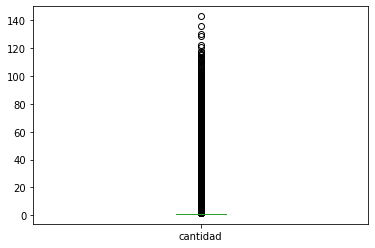

In [29]:
# Graficar la cantidad de implicados
df_violence.cantidad.plot.box()

In [30]:
# Establecer un límite "aceptable" para el número de implicados
# Cuántos registros hay fuera del límite?
df_violence.query("cantidad>15")

,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etario,cantidad
39,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CONTUNDENTES,2010-01-01,FEMENINO,ADULTOS,22
94,VALLE,CALI (CT),76001000,CONTUNDENTES,2010-01-01,FEMENINO,ADULTOS,27
847,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CONTUNDENTES,2010-01-17,FEMENINO,ADULTOS,16
2957,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CONTUNDENTES,2010-02-28,FEMENINO,ADULTOS,17
3238,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CONTUNDENTES,2010-03-06,FEMENINO,ADULTOS,20
...,...,...,...,...,...,...,...,...
575430,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,SIN EMPLEO DE ARMAS,2023-02-26,MASCULINO,ADULTOS,44
575558,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,SIN EMPLEO DE ARMAS,2023-02-27,FEMENINO,ADULTOS,39
575559,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,SIN EMPLEO DE ARMAS,2023-02-27,MASCULINO,ADULTOS,36
575668,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,SIN EMPLEO DE ARMAS,2023-02-28,FEMENINO,ADULTOS,31


In [31]:
# Eliminar los outliers
df_violence = df_violence.query("cantidad <= 15")
df_violence

,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etario,cantidad
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
...,...,...,...,...,...,...,...,...
575716,VALLE,CARTAGO,76147000,SIN EMPLEO DE ARMAS,2023-02-28,FEMENINO,ADULTOS,1
575717,VALLE,GUACARÍ,76318000,SIN EMPLEO DE ARMAS,2023-02-28,FEMENINO,ADULTOS,1
575718,VALLE,GUADALAJARA DE BUGA,76111000,SIN EMPLEO DE ARMAS,2023-02-28,FEMENINO,ADULTOS,1
575719,VALLE,PALMIRA,76520000,SIN EMPLEO DE ARMAS,2023-02-28,FEMENINO,ADULTOS,2


In [32]:
# Reiniciar los índices
df_violence = df_violence.reset_index(drop=True)
df_violence

,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etario,cantidad
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
2,CAQUETÁ,PUERTO RICO,18592000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,1
3,CASANARE,MANÍ,85139000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
4,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1
...,...,...,...,...,...,...,...,...
523902,VALLE,CARTAGO,76147000,SIN EMPLEO DE ARMAS,2023-02-28,FEMENINO,ADULTOS,1
523903,VALLE,GUACARÍ,76318000,SIN EMPLEO DE ARMAS,2023-02-28,FEMENINO,ADULTOS,1
523904,VALLE,GUADALAJARA DE BUGA,76111000,SIN EMPLEO DE ARMAS,2023-02-28,FEMENINO,ADULTOS,1
523905,VALLE,PALMIRA,76520000,SIN EMPLEO DE ARMAS,2023-02-28,FEMENINO,ADULTOS,2


<AxesSubplot:xlabel='cantidad'>

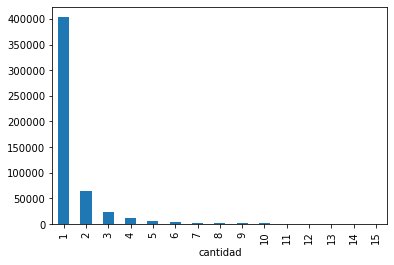

In [33]:
# Veamos de nuevo los outliers en un barplot
df_violence.cantidad.value_counts().plot.bar()

## Análisis

In [34]:
# Número de casos por departamento
df_violence_GD = df_violence.groupby("departamento").agg("sum", numeric_only=True)
df_violence_GD

/tmp/ipykernel_60548/31547291.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_violence_GD = df_violence.groupby("departamento").agg("sum", numeric_only=True)


,cantidad
departamento,
AMAZONAS,1708
ANTIOQUIA,102920
ARAUCA,4869
ATLÁNTICO,32837
BOLÍVAR,28750
BOYACÁ,39526
CALDAS,12473
CAQUETÁ,6768
CASANARE,8459


<AxesSubplot:xlabel='departamento'>

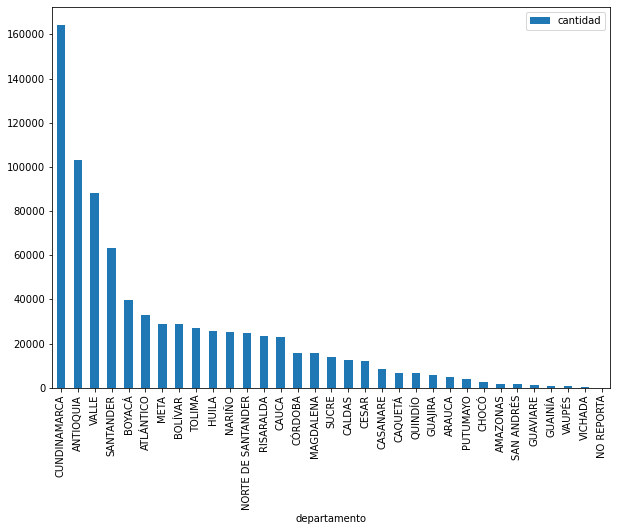

In [35]:
# Número de casos por departamento (gráfica)
fig, ax = plt.subplots(figsize=(10,7))
df_violence_GD.sort_values(by="cantidad", ascending=False).plot.bar(ax=ax)

<AxesSubplot:xlabel='armas_medios'>

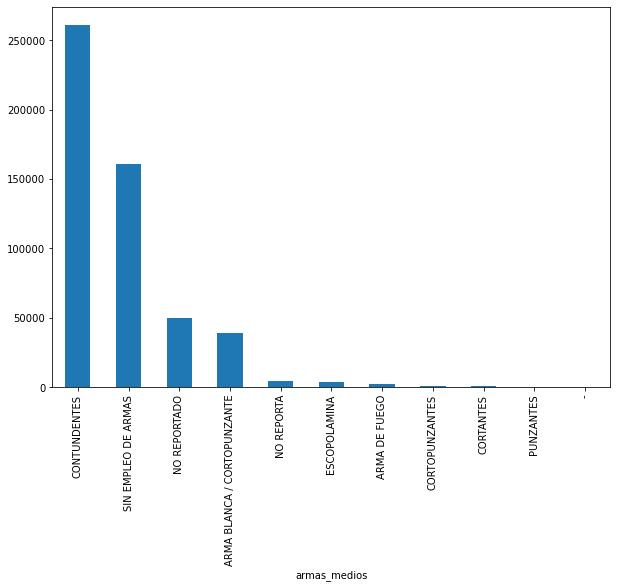

In [36]:
# Armas más usadas
fig, ax = plt.subplots(figsize=(10,7))
df_violence.armas_medios.value_counts().plot.bar(ax=ax)

In [37]:
# Casos por años
df_violence_GY = df_violence.groupby(by=df_violence.fecha_hecho.dt.year)
df_violence_GY.groups.keys()

dict_keys([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

<AxesSubplot:xlabel='fecha_hecho'>

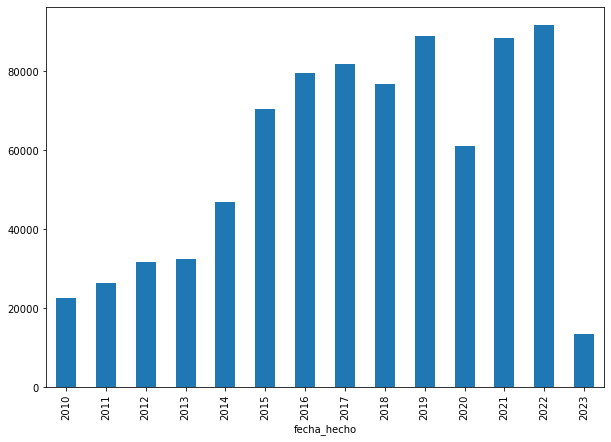

In [38]:
# Casos por años (gráfico)
fig, ax = plt.subplots(figsize=(10,7))
df_violence_GY["cantidad"].agg("sum").plot.bar(ax=ax)